# Factual Probing Analysis


In [ ]:
%%bash

# bert-multilingual-uncased
gdown --id 1kZfB9NLfY1yKZN8bwDZbMccU0ypESAH3
gdown --id 1-ltAab2KCgn2bDrUTRoShqDKhxVfjA6u
gdown --id 1jnNVp3a3pDwFGSFsUD7NE_tlBNzqFl9s

# xlm-roberta-base
gdown --id 14xMQd74NBkFGxe0wSrCpxhBwCZV9bq9V
gdown --id 1FgSRAct4gd-dXsCLmj4wHWIvvl4Bt3qL
gdown --id 1DcDL-HNb_AgKAPD66Kr94bEI0MewlNgG

# xlm-roberta-large
gdown --id 19BZeMkYH-b0gvVo9LKgwzb3UjMZHbiDn
gdown --id 1WePvY_hmxcGHp7ImCg4UWqyBl1DTOvTA
gdown --id 11c_k3V0Hw_6Dnyh6vdMmEiytI_Bn_AGk

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kZfB9NLfY1yKZN8bwDZbMccU0ypESAH3
To: /content/bert_base_multilingual_uncased_en_ar_neurons.zip
100%|██████████| 1.86M/1.86M [00:00<00:00, 32.6MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-ltAab2KCgn2bDrUTRoShqDKhxVfjA6u
To: /content/bert_base_multilingual_uncased_en_bn_neurons.zip
100%|██████████| 129k/129k [00:00<00:00, 74.0MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass i

In [ ]:
import os
import glob

paths = sorted(glob.glob("*.zip"))
for path in paths:
    output_dir = path.replace(".zip", "")
    print(output_dir)
    os.system(f"unzip {path} -d {output_dir}")

bert_base_multilingual_uncased_en_ar_neurons
bert_base_multilingual_uncased_en_bn_neurons
bert_base_multilingual_uncased_en_fr_neurons
xlm_roberta_base_en_ar_neurons
xlm_roberta_base_en_bn_neurons
xlm_roberta_base_en_fr_neurons
xlm_roberta_large_en_ar_neurons
xlm_roberta_large_en_bn_neurons
xlm_roberta_large_en_fr_neurons


## Knowledge Suppression/Enhancement


In [ ]:
%matplotlib inline

import os
import json
import glob
import warnings
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

warnings.filterwarnings("ignore")

In [ ]:
def format_data(results_data, key='suppression'):
    formatted = {}
    for uuid, data in results_data.items():
        if formatted.get(data["relation_name"]) is None:
            formatted[data["relation_name"]] = {"related": []}

        related_data = data[key]["related"]
        related_change = []
        for prob in related_data["pct_change"]:
            related_change.append(prob)

        # for some prompts we didn't get any neurons back, it would be unfair to include them
        if data["n_refined_neurons"] > 0:
            if related_change:
                related_change = sum(related_change) / len(
                    related_change
                )
                formatted[data["relation_name"]]["related"].append(related_change)

    for relation_name, data in formatted.items():
        if data["related"]:
            data["related"] = sum(data["related"]) / len(data["related"])
        else:
            data["related"] = float("nan")

    pandas_format = {'relation_name': [], 'related': [], 'pct_change': []}
    for relation_name, data in formatted.items():
        pandas_format['relation_name'].append(relation_name)
        pandas_format['pct_change'].append(data['related'])
        pandas_format['related'].append(key)

    df = pd.DataFrame(pandas_format).dropna()
    df["pct_change"] = df["pct_change"] * 100.0
    return df

In [ ]:
results_dir = "/content/bert_base_multilingual_uncased_en_bn_neurons"
result_paths = sorted(glob.glob(os.path.join(results_dir, "*_results.json")))

results = {}
for p in result_paths:
    with open(p) as f:
        results.update(json.load(f))

suppression_data_mbert_uncased = format_data(results, key='suppression')
enhancement_data_mbert_uncased = format_data(results, key='enhancement')

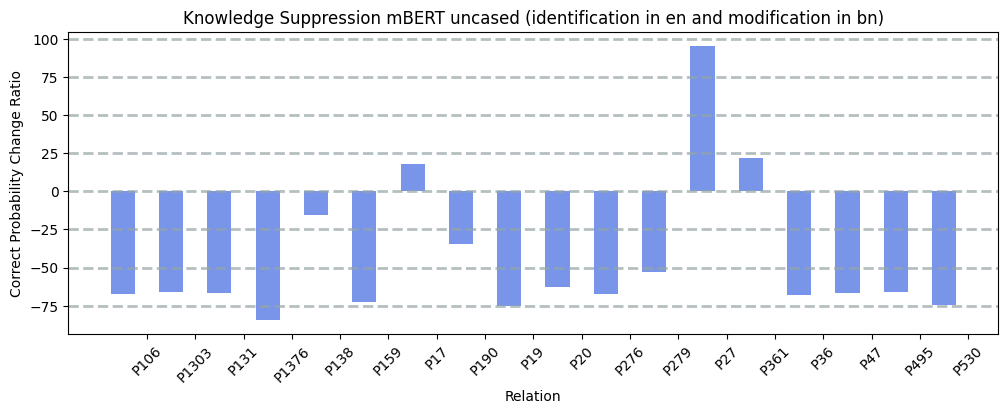

In [ ]:
with plt.rc_context(rc={"font.family": "DejaVu Sans"}):
    fig, ax = plt.subplots(figsize=(12, 4), dpi=100)
    h = ax.bar(
        suppression_data_mbert_uncased['relation_name'],
        suppression_data_mbert_uncased['pct_change'],
        width=0.5,
        alpha=0.7,
        color="royalblue"
    )
    ax.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

    # column_range = [-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]
    # ax.set_yticks([0.5 + i for i in range(len(column_range))])
    # ax.set_yticklabels(column_range)
    ax.set_xticks([0.5 + i for i in range(len(suppression_data_mbert_uncased['relation_name']))])
    ax.set_xticklabels(suppression_data_mbert_uncased['relation_name'], rotation=45)
    ax.set_title("Knowledge Suppression mBERT uncased (identification in en and modification in bn)")
    ax.set_xlabel("Relation")
    ax.set_ylabel("Correct Probability Change Ratio")
    # os.makedirs(os.path.dirname(save_path), exist_ok=True)
    # plt.savefig(save_path, bbox_inches="tight")
    plt.show();

In [ ]:
import os
import glob
import json
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from pathlib import Path

In [ ]:
def format_data(results_data, key='suppression'):
    formatted = {}
    for uuid, data in results_data.items():
        if formatted.get(data["relation_name"]) is None:
            formatted[data["relation_name"]] = {"related": []}

        related_data = data[key]["related"]
        related_change = []
        for prob in related_data["pct_change"]:
            related_change.append(prob)

        # for some prompts we didn't get any neurons back, it would be unfair to include them
        if data["n_refined_neurons"] > 0:
            if related_change:
                related_change = sum(related_change) / len(
                    related_change
                )
                formatted[data["relation_name"]]["related"].append(related_change)

    for relation_name, data in formatted.items():
        if data["related"]:
            data["related"] = sum(data["related"]) / len(data["related"])
        else:
            data["related"] = float("nan")

    pandas_format = {'relation_name': [], 'related': [], 'pct_change': []}
    for relation_name, data in formatted.items():
        pandas_format['relation_name'].append(relation_name)
        pandas_format['pct_change'].append(data['related'])
        pandas_format['related'].append(key)
    return pd.DataFrame(pandas_format).dropna()

#### mBERT uncased (En - Bn)


In [ ]:
results_dir = "/content/bert_base_multilingual_uncased_en_bn_neurons"
result_paths = sorted(glob.glob(os.path.join(results_dir, "*_results.json")))

results = {}
for p in result_paths:
    with open(p) as f:
        results.update(json.load(f))

suppression_data_mbert_uncased = format_data(results, key='suppression')
enhancement_data_mbert_uncased = format_data(results, key='enhancement')

In [ ]:
fig = px.bar(
    suppression_data_mbert_uncased, y='pct_change', x='relation_name', text_auto='.2f', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Knowledge Suppression mBERT uncased (identification in en and modification in bn)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
fig = px.bar(
    enhancement_data_mbert_uncased, y='pct_change', x='relation_name', text_auto='.2f', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    title="Knowledge Suppression mBERT uncased (identification in en and modification in bn)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

#### XLM RoBERTa Base (En - Bn)


In [ ]:
results_dir = "/content/xlm_roberta_base_en_bn_neurons"
result_paths = sorted(glob.glob(os.path.join(results_dir, "*_results.json")))

results = {}
for p in result_paths:
    with open(p) as f:
        results.update(json.load(f))

suppression_data_xlm_base = format_data(results, key='suppression')
enhancement_data_xlm_base = format_data(results, key='enhancement')

In [ ]:
fig = px.bar(
    suppression_data_xlm_base, y='pct_change', x='relation_name', text_auto='.2f', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Knowledge Suppression XLM RoBERTa Base (identification in en and modification in bn)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
fig = px.bar(
    enhancement_data_xlm_base, y='pct_change', x='relation_name', text_auto='.2s', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    title="Knowledge Enhancement XLM RoBERTa Base (identification in en and modification in bn)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

#### XLM RoBERTa Large (En - Bn)


In [ ]:
results_dir = "/content/xlm_roberta_large_en_bn_neurons"
result_paths = sorted(glob.glob(os.path.join(results_dir, "*_results.json")))

results = {}
for p in result_paths:
    with open(p) as f:
        results.update(json.load(f))

suppression_data_xlm_large = format_data(results, key='suppression')
enhancement_data_xlm_large = format_data(results, key='enhancement')

In [ ]:
fig = px.bar(
    suppression_data_xlm_large, y='pct_change', x='relation_name', text_auto='.2f', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Knowledge Suppression XLM RoBERTa Large (identification in en and modification in bn)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
fig = px.bar(
    enhancement_data_xlm_large, y='pct_change', x='relation_name', text_auto='.2f', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    title="Knowledge Enhancement XLM RoBERTa Large (identification in en and modification in bn)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

#### mBERT uncased (En - Fr)


In [ ]:
results_dir = "/content/bert_base_multilingual_uncased_en_fr_neurons"
result_paths = sorted(glob.glob(os.path.join(results_dir, "*_results.json")))

results = {}
for p in result_paths:
    with open(p) as f:
        results.update(json.load(f))

suppression_data_mbert_uncased = format_data(results, key='suppression')
enhancement_data_mbert_uncased = format_data(results, key='enhancement')

In [ ]:
fig = px.bar(
    suppression_data_mbert_uncased, y='pct_change', x='relation_name', text_auto='.2f', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Knowledge Suppression mBERT uncased (identification in en and modification in fr)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
fig = px.bar(
    enhancement_data_mbert_uncased, y='pct_change', x='relation_name', text_auto='.2f', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    title="Knowledge Suppression mBERT uncased (identification in en and modification in fr)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### XLM RoBERTa Base (En - Fr)


In [ ]:
results_dir = "/content/xlm_roberta_base_en_fr_neurons"
result_paths = sorted(glob.glob(os.path.join(results_dir, "*_results.json")))

results = {}
for p in result_paths:
    with open(p) as f:
        results.update(json.load(f))

suppression_data_xlm_base = format_data(results, key='suppression')
enhancement_data_xlm_base = format_data(results, key='enhancement')

In [ ]:
fig = px.bar(
    suppression_data_xlm_base, y='pct_change', x='relation_name', text_auto=".2s", # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Knowledge Suppression XLM RoBERTa Base (identification in en and modification in fr)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
fig = px.bar(
    enhancement_data_xlm_base, y='pct_change', x='relation_name', text_auto=".2s", # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    title="Knowledge Enhancement XLM RoBERTa Base (identification in en and modification in fr)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### XLM RoBERTa Large (En - Fr)


In [ ]:
results_dir = "/content/xlm_roberta_large_en_fr_neurons"
result_paths = sorted(glob.glob(os.path.join(results_dir, "*_results.json")))

results = {}
for p in result_paths:
    with open(p) as f:
        results.update(json.load(f))

suppression_data_xlm_large = format_data(results, key='suppression')
enhancement_data_xlm_large = format_data(results, key='enhancement')

In [ ]:
fig = px.bar(
    suppression_data_xlm_large, y='pct_change', x='relation_name', text_auto='.2f', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Knowledge Suppression XLM RoBERTa Large (identification in en and modification in fr)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
fig = px.bar(
    enhancement_data_xlm_large, y='pct_change', x='relation_name', text_auto='.2f', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    title="Knowledge Enhancement XLM RoBERTa Large (identification in en and modification in fr)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### mBERT uncased (En - Ar)


In [ ]:
results_dir = "/content/bert_base_multilingual_uncased_en_ar_neurons"
result_paths = sorted(glob.glob(os.path.join(results_dir, "*_results.json")))

results = {}
for p in result_paths:
    with open(p) as f:
        results.update(json.load(f))

suppression_data_mbert_uncased = format_data(results, key='suppression')
enhancement_data_mbert_uncased = format_data(results, key='enhancement')

In [ ]:
fig = px.bar(
    suppression_data_mbert_uncased, y='pct_change', x='relation_name', text_auto='.2f', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Knowledge Suppression mBERT uncased (identification in en and modification in ar)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
fig = px.bar(
    enhancement_data_mbert_uncased, y='pct_change', x='relation_name', text_auto='.2f', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    title="Knowledge Suppression mBERT uncased (identification in en and modification in ar)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### XLM RoBERTa Base (En - Ar)


In [ ]:
results_dir = "/content/xlm_roberta_base_en_ar_neurons"
result_paths = sorted(glob.glob(os.path.join(results_dir, "*_results.json")))

results = {}
for p in result_paths:
    with open(p) as f:
        results.update(json.load(f))

suppression_data_xlm_base = format_data(results, key='suppression')
enhancement_data_xlm_base = format_data(results, key='enhancement')

In [ ]:
fig = px.bar(
    suppression_data_xlm_base, y='pct_change', x='relation_name', text_auto=".2s", # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Knowledge Suppression XLM RoBERTa Base (identification in en and modification in ar)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
fig = px.bar(
    enhancement_data_xlm_base, y='pct_change', x='relation_name', text_auto=".2s",
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    title="Knowledge Enhancement XLM RoBERTa Base (identification in en and modification in ar)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

### XLM RoBERTa Large (En - Ar)


In [ ]:
results_dir = "/content/xlm_roberta_large_en_ar_neurons"
result_paths = sorted(glob.glob(os.path.join(results_dir, "*_results.json")))

results = {}
for p in result_paths:
    with open(p) as f:
        results.update(json.load(f))

suppression_data_xlm_large = format_data(results, key='suppression')
enhancement_data_xlm_large = format_data(results, key='enhancement')

In [ ]:
fig = px.bar(
    suppression_data_xlm_large, y='pct_change', x='relation_name', text_auto='.2f', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="Knowledge Suppression XLM RoBERTa Large (identification in en and modification in ar)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
fig = px.bar(
    enhancement_data_xlm_large, y='pct_change', x='relation_name', text_auto='.2f', # color="related", pattern_shape="related",
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    title="Knowledge Enhancement XLM RoBERTa Large (identification in en and modification in ar)")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

## Neuron Visualization


In [ ]:
%pip install transformers --upgrade

In [ ]:
!ls /content

bert_base_multilingual_uncased_en_ar_neurons
bert_base_multilingual_uncased_en_ar_neurons.zip
bert_base_multilingual_uncased_en_bn_neurons
bert_base_multilingual_uncased_en_bn_neurons.zip
bert_base_multilingual_uncased_en_fr_neurons
bert_base_multilingual_uncased_en_fr_neurons.zip
sample_data
xlm_roberta_base_en_ar_neurons
xlm_roberta_base_en_ar_neurons.zip
xlm_roberta_base_en_bn_neurons
xlm_roberta_base_en_bn_neurons.zip
xlm_roberta_base_en_fr_neurons
xlm_roberta_base_en_fr_neurons.zip
xlm_roberta_large_en_ar_neurons
xlm_roberta_large_en_ar_neurons.zip
xlm_roberta_large_en_bn_neurons
xlm_roberta_large_en_bn_neurons.zip
xlm_roberta_large_en_fr_neurons
xlm_roberta_large_en_fr_neurons.zip


In [ ]:
%matplotlib inline

import os
import json
import glob
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoConfig

warnings.filterwarnings("ignore")

mbert_uncased_config = AutoConfig.from_pretrained("bert-base-multilingual-uncased")
xlm_roberta_base_config = AutoConfig.from_pretrained("xlm-roberta-base")
xlm_roberta_large_config = AutoConfig.from_pretrained("xlm-roberta-large")

In [ ]:
def plot_neurons_dist(neurons_dir, config, save_path, title, xlabel, ylabel, cmap="Green"):
    neurons_paths = sorted(glob.glob(os.path.join(neurons_dir, "*_neurons.json")))

    num_relations = len(neurons_paths)
    relations = [os.path.basename(p).split("_")[1] for p in neurons_paths]

    neurons_arr = np.zeros((len(relations), config.num_hidden_layers))

    for p in neurons_paths:
        relation_name = os.path.basename(p).split("_")[1]
        r = relations.index(relation_name)
        with open(p) as f:
            neurons = json.load(f)
            if len(neurons) == 0:
                continue

            for neuron_list in neurons.values():
                for l, n in neuron_list:
                    neurons_arr[r, l] += 1

    row_sums = neurons_arr.sum(axis=1)
    neurons_arr = neurons_arr / (row_sums[:, np.newaxis] + 1e-12)

    columns = list(range(0, config.num_hidden_layers))
    index = relations
    df = pd.DataFrame(neurons_arr, index=index, columns=columns)

    with plt.rc_context(rc={"font.family": "Times New Roman"}):
        fig, ax = plt.subplots(figsize=(16, 4), dpi=100)
        h = ax.pcolor(
            df.T,
            cmap=cmap,
        )
        ax.set_xticks([0.5 + i for i in range(len(index))])
        ax.set_xticklabels(index, rotation=45)
        ax.set_yticks([0.5 + i for i in range(len(columns))])
        ax.set_yticklabels(columns)
        cb = plt.colorbar(h)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, bbox_inches="tight")
        plt.show()

### mBERT uncased


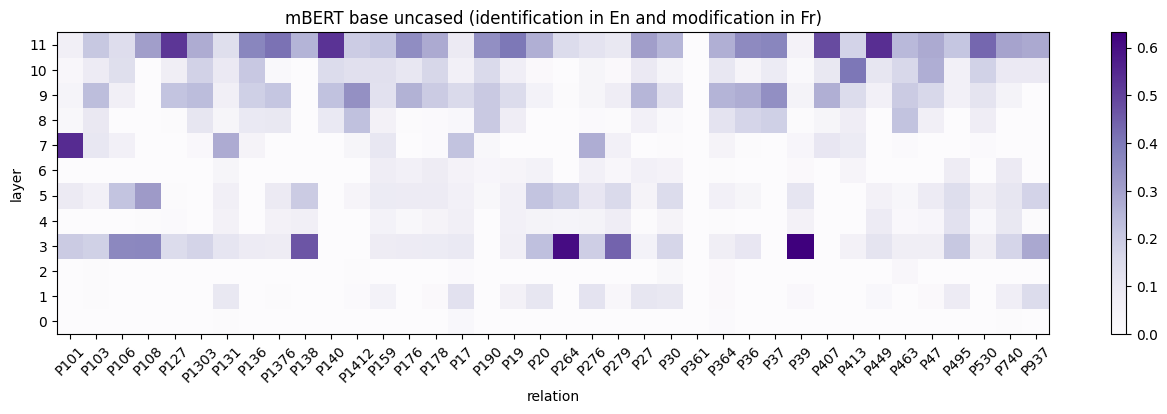

In [ ]:
plot_neurons_dist(
    neurons_dir="bert_base_multilingual_uncased_en_fr_neurons",
    config=mbert_uncased_config,
    save_path="figures/mbert_base_uncased_en_fr_neurons_dist.pdf",
    title="mBERT base uncased (identification in En and modification in Fr)",
    xlabel="relation",
    ylabel="layer",
    cmap="Purples"  # [Purples, Greens, Reds]
)

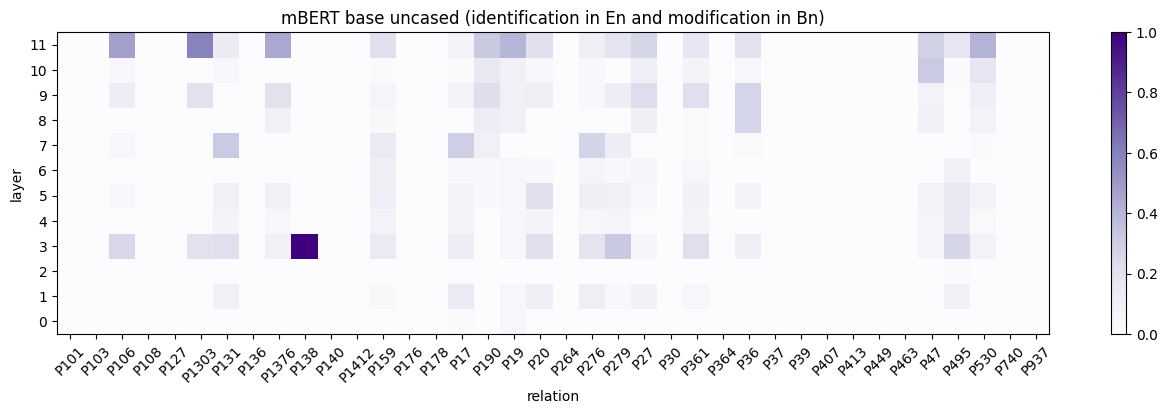

In [ ]:
plot_neurons_dist(
    neurons_dir="bert_base_multilingual_uncased_en_bn_neurons",
    config=mbert_uncased_config,
    save_path="figures/mbert_base_uncased_en_bn_neurons_dist.pdf",
    title="mBERT base uncased (identification in En and modification in Bn)",
    xlabel="relation",
    ylabel="layer",
    cmap="Purples"  # [Purples, Greens, Reds]
)

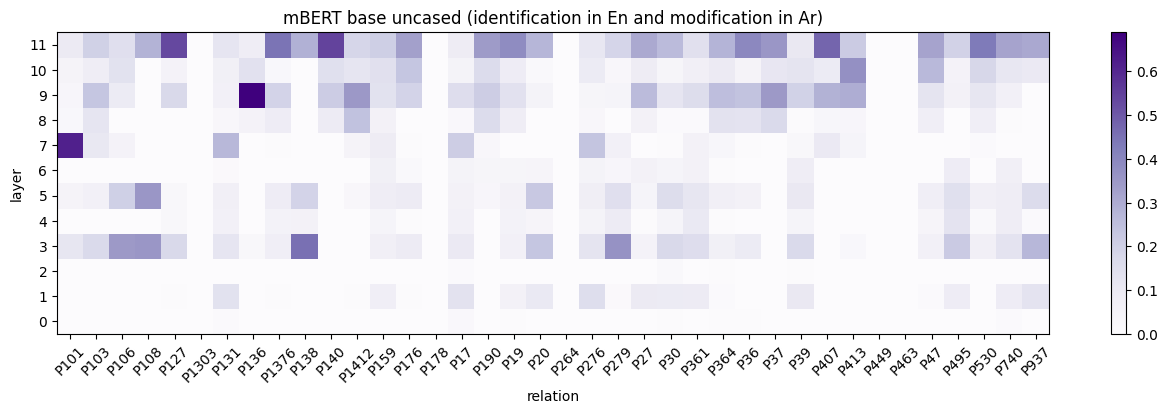

In [ ]:
plot_neurons_dist(
    neurons_dir="bert_base_multilingual_uncased_en_ar_neurons",
    config=mbert_uncased_config,
    save_path="figures/mbert_base_uncased_en_ar_neurons_dist.pdf",
    title="mBERT base uncased (identification in En and modification in Ar)",
    xlabel="relation",
    ylabel="layer",
    cmap="Purples"  # [Purples, Greens, Reds]
)

### XLM RoBERTa base


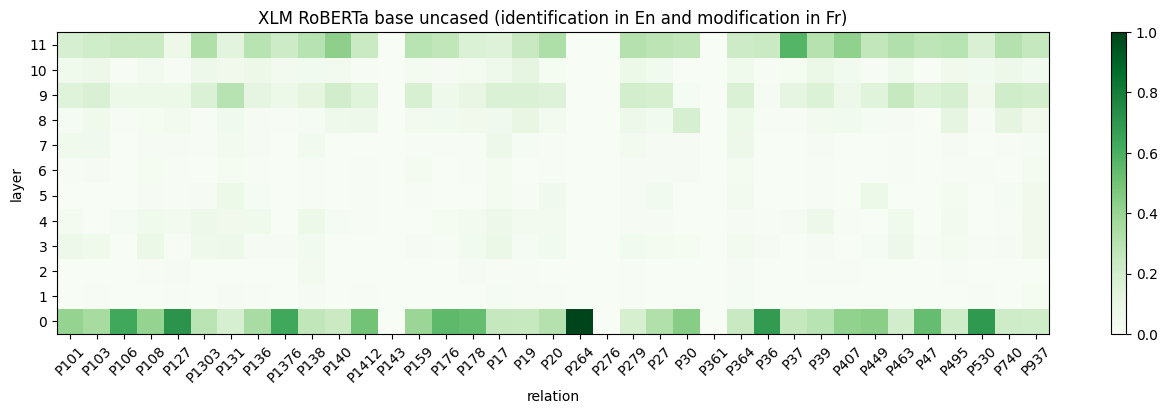

In [ ]:
plot_neurons_dist(
    neurons_dir="xlm_roberta_base_en_fr_neurons",
    config=xlm_roberta_base_config,
    save_path="figures/xlm_roberta_base_en_fr_neurons_dist.pdf",
    title="XLM RoBERTa base uncased (identification in En and modification in Fr)",
    xlabel="relation",
    ylabel="layer",
    cmap="Greens"  # [Purples, Greens, Reds]
)

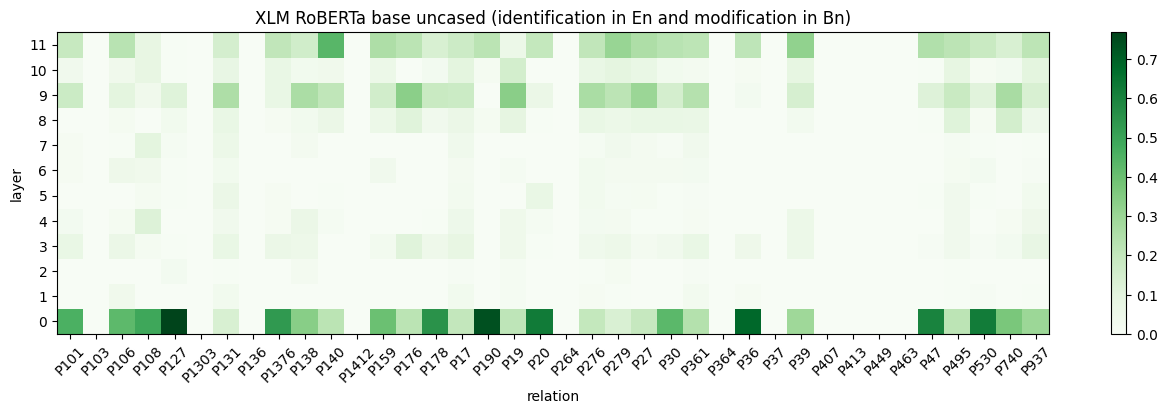

In [ ]:
plot_neurons_dist(
    neurons_dir="xlm_roberta_base_en_bn_neurons",
    config=xlm_roberta_base_config,
    save_path="figures/xlm_roberta_base_en_bn_neurons_dist.pdf",
    title="XLM RoBERTa base uncased (identification in En and modification in Bn)",
    xlabel="relation",
    ylabel="layer",
    cmap="Greens"  # [Purples, Greens, Reds]
)

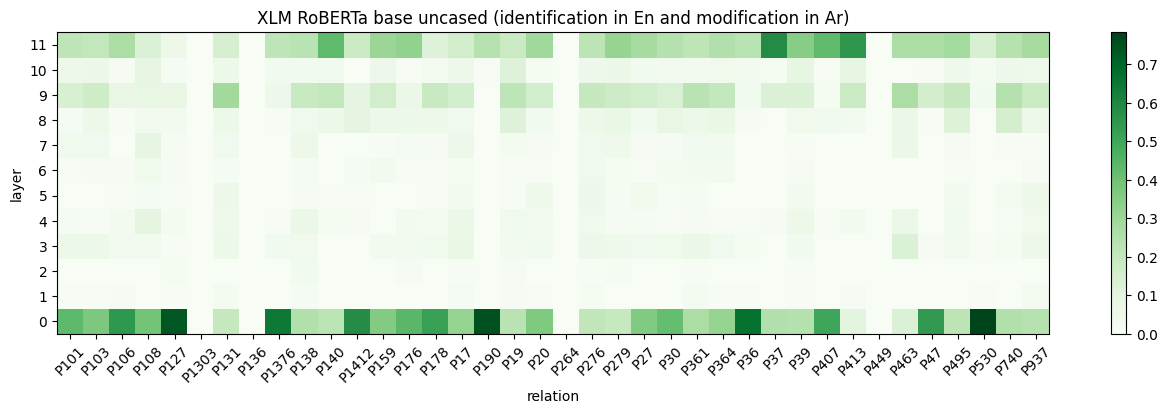

In [ ]:
plot_neurons_dist(
    neurons_dir="xlm_roberta_base_en_ar_neurons",
    config=xlm_roberta_base_config,
    save_path="figures/xlm_roberta_base_en_ar_neurons_dist.pdf",
    title="XLM RoBERTa base uncased (identification in En and modification in Ar)",
    xlabel="relation",
    ylabel="layer",
    cmap="Greens"  # [Purples, Greens, Reds]
)

### XLM RoBERTa large


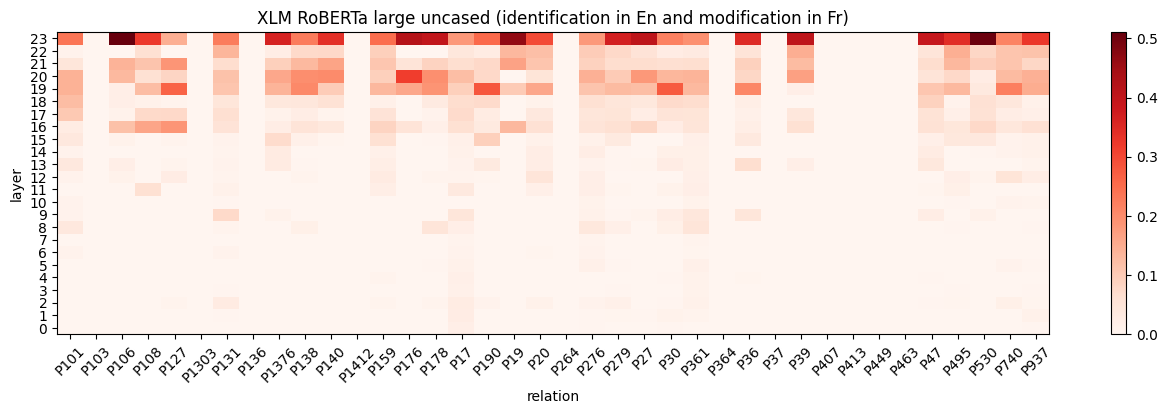

In [ ]:
plot_neurons_dist(
    neurons_dir="xlm_roberta_large_en_fr_neurons",
    config=xlm_roberta_large_config,
    save_path="figures/xlm_roberta_large_en_fr_neurons_dist.pdf",
    title="XLM RoBERTa large uncased (identification in En and modification in Fr)",
    xlabel="relation",
    ylabel="layer",
    cmap="Reds"  # [Purples, Greens, Reds]
)

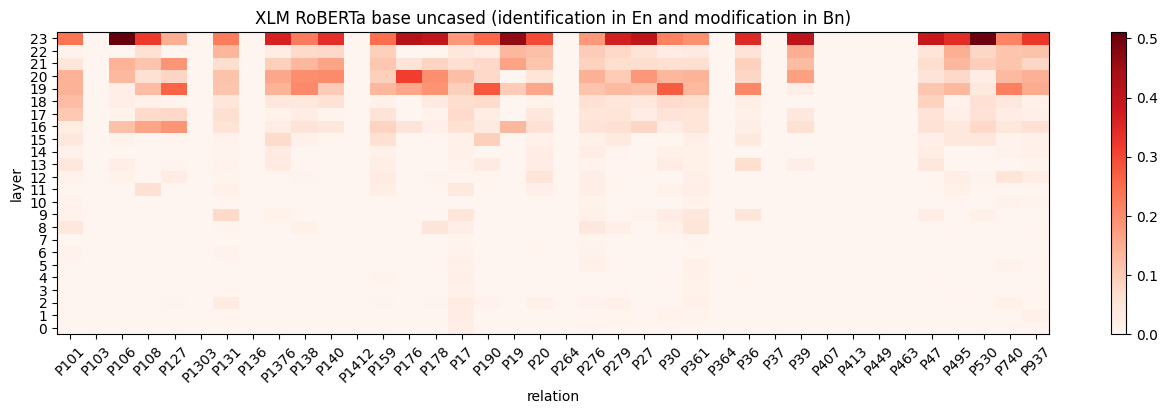

In [ ]:
plot_neurons_dist(
    neurons_dir="xlm_roberta_large_en_bn_neurons",
    config=xlm_roberta_large_config,
    save_path="figures/xlm_roberta_large_en_bn_neurons_dist.pdf",
    title="XLM RoBERTa base uncased (identification in En and modification in Bn)",
    xlabel="relation",
    ylabel="layer",
    cmap="Reds"  # [Purples, Greens, Reds]
)

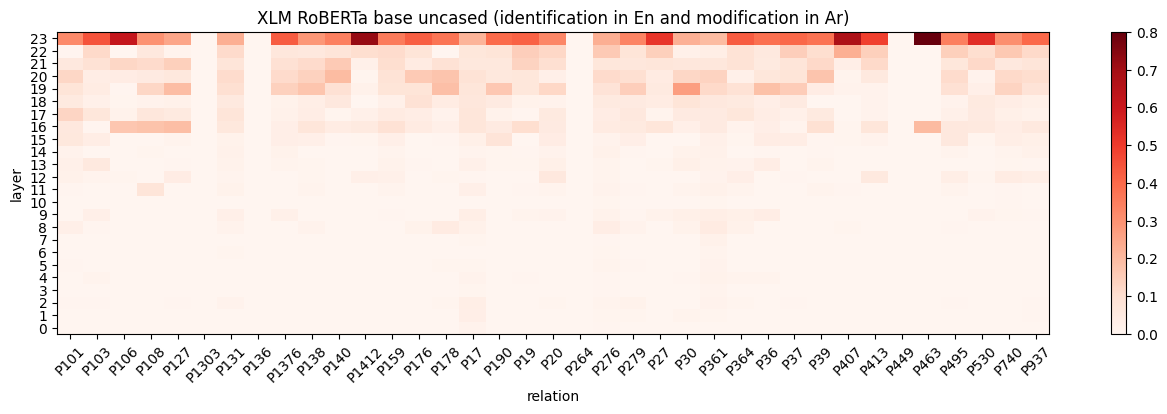

In [ ]:
plot_neurons_dist(
    neurons_dir="xlm_roberta_large_en_ar_neurons",
    config=xlm_roberta_large_config,
    save_path="figures/xlm_roberta_large_en_ar_neurons_dist.pdf",
    title="XLM RoBERTa base uncased (identification in En and modification in Ar)",
    xlabel="relation",
    ylabel="layer",
    cmap="Reds"  # [Purples, Greens, Reds]
)